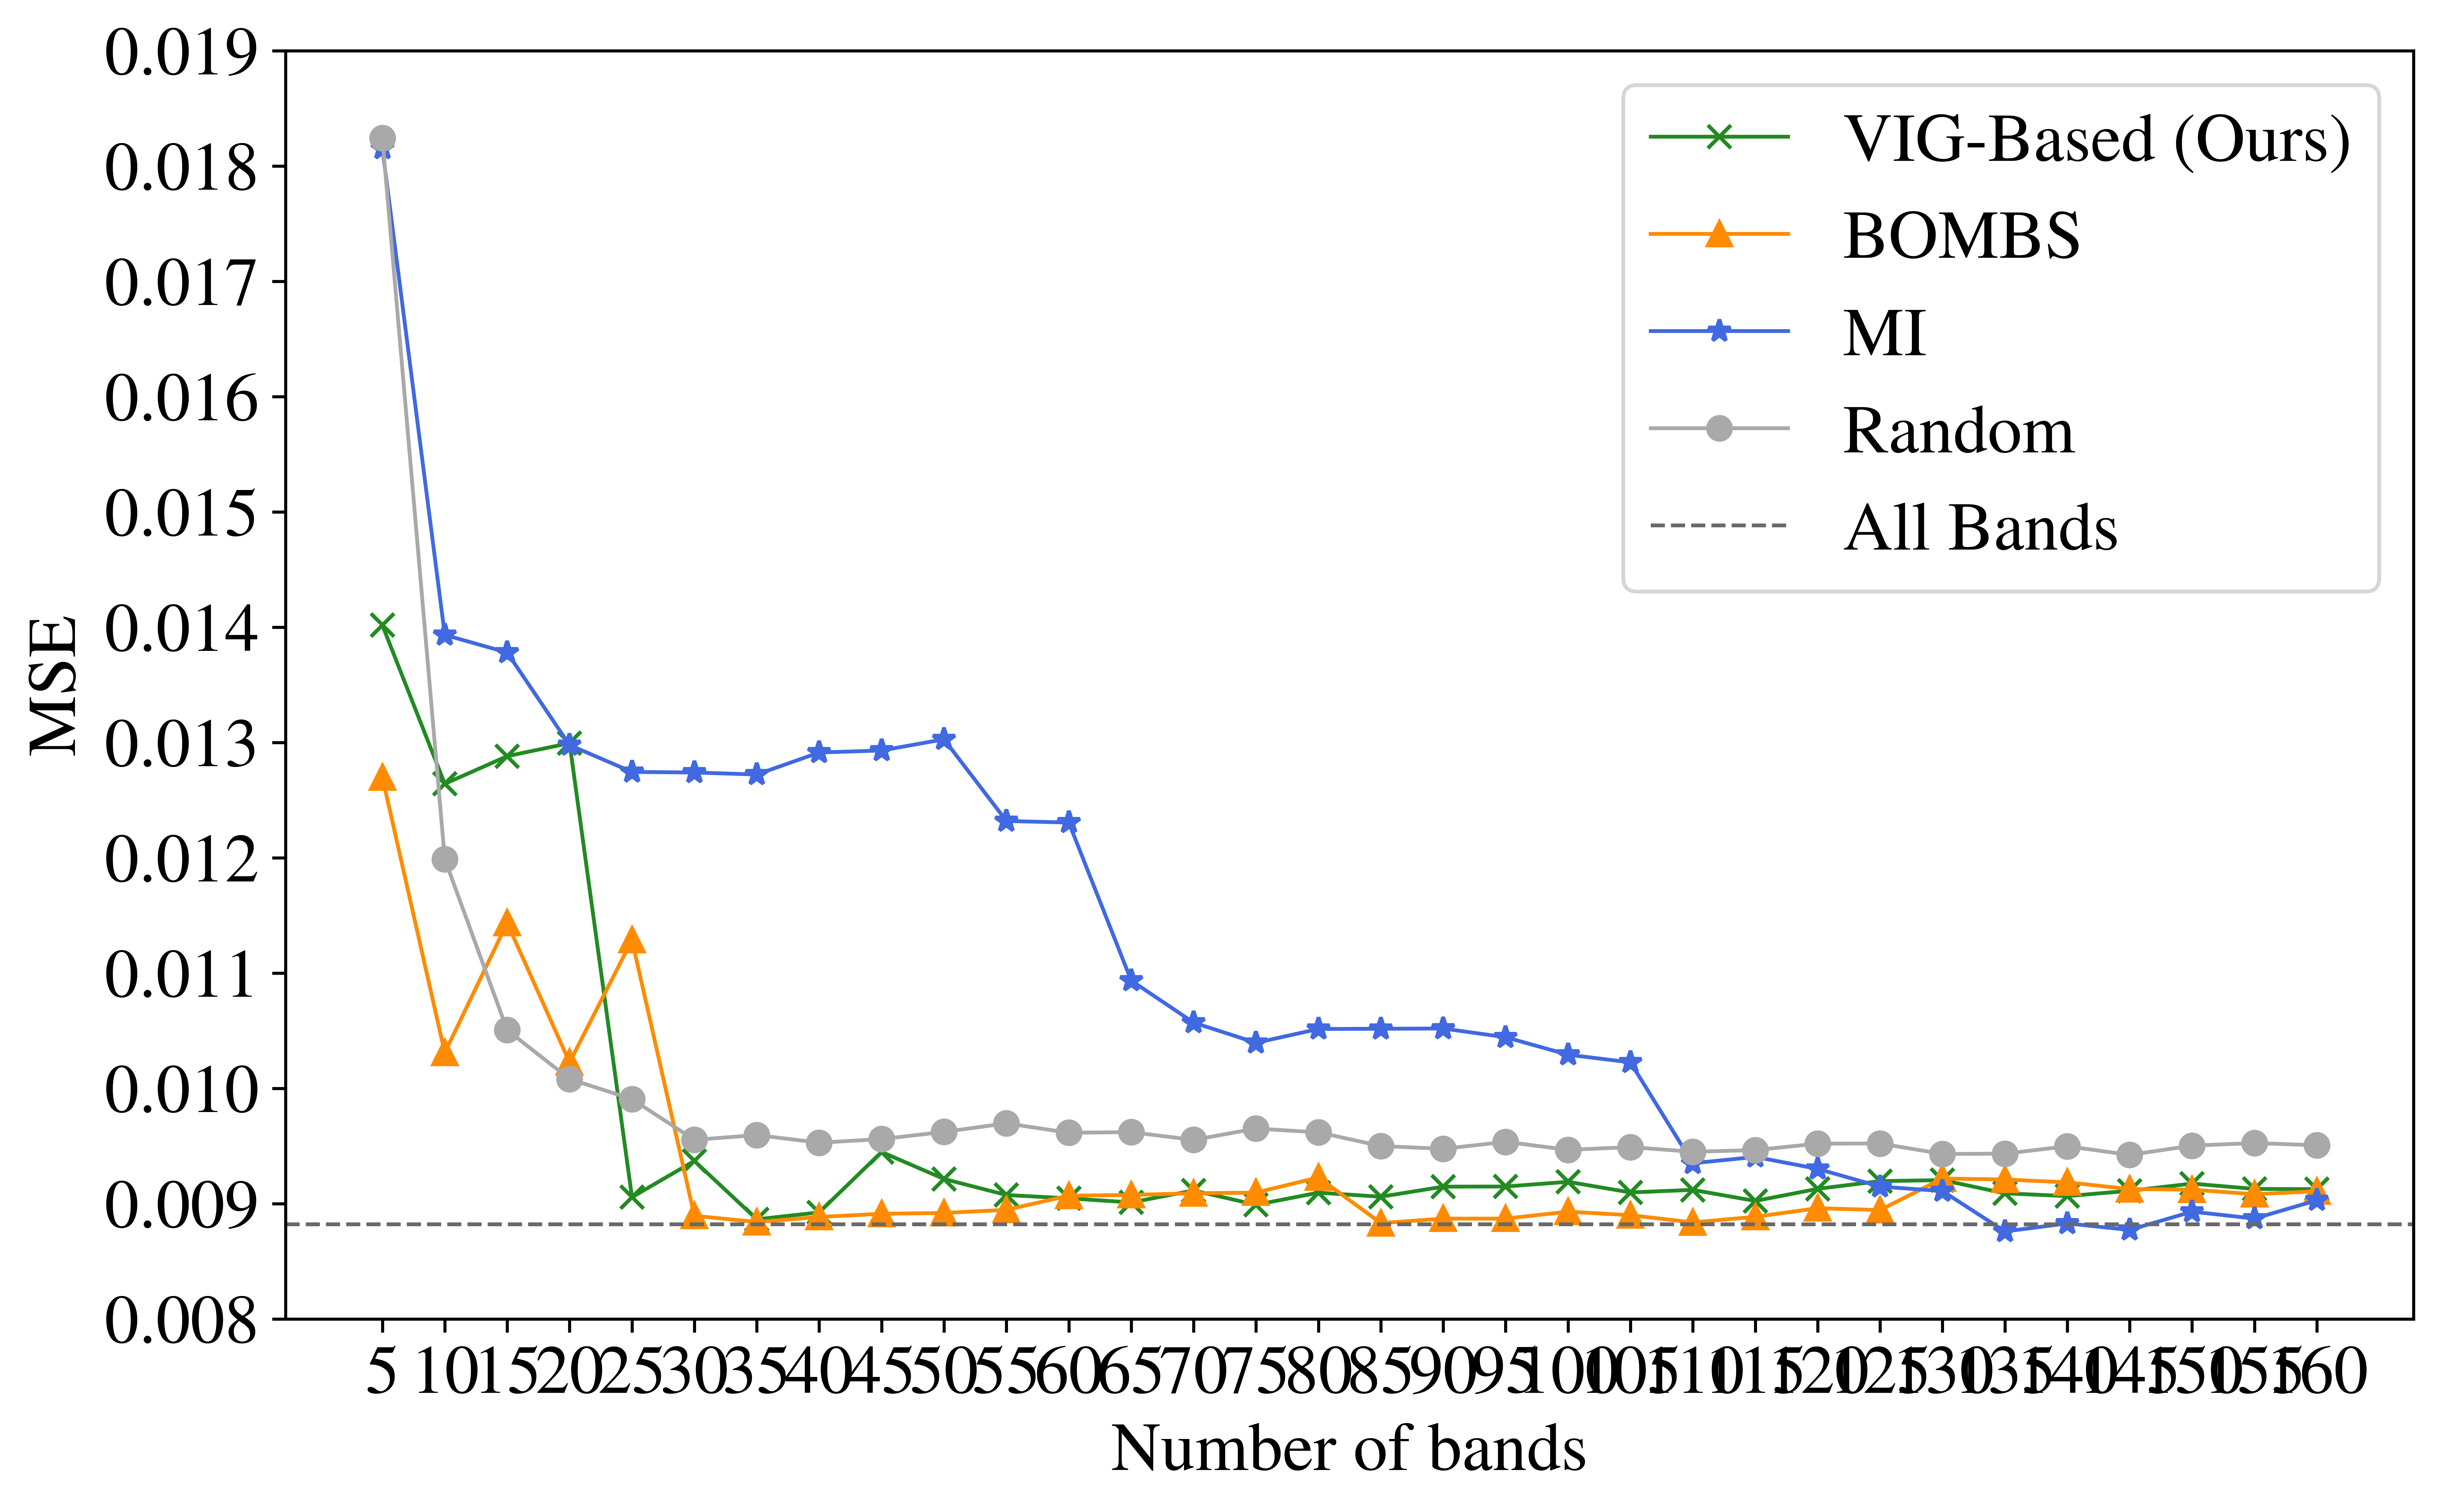

In [10]:
bombs_dir = "results_test_frac_band_sel_estimators_4_bombs"
mi_dir = "results_test_frac_band_sel_estimators_4_mi"
vig_dir = "results_test_frac_band_sel_estimators_4_vig"
random_dir = "results_test_frac_band_sel_estimators_4_random"


import pandas as pd



import numpy as np



global_mse_vig_results = []


global_mse_bombs_results = []


global_mse_mi_results = []

global_mse_random_results = []

for n_bands in range(5, 161, 5):
    mse_bombs_results, mse_vig_results, mse_mi_results = [], [], []
    mse_random_results = []

    for i in range(20):
        b = pd.read_csv(
            f"{bombs_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )


        v = pd.read_csv(
            f"{vig_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )


        m = pd.read_csv(
            f"{mi_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )

        pc = pd.read_csv(
            f"{random_dir}/n_clusters-{n_bands},test_size-band_sel,random_state-{i}.csv"
        )

        mse_bombs_results.append(b["mse_mean"].item())


        mse_vig_results.append(v["mse_mean"].item())

        mse_mi_results.append(m["mse_mean"].item())

        mse_random_results.append(pc["mse_mean"].item())

    global_mse_bombs_results.append(np.mean(np.sort(mse_bombs_results)).item())


    global_mse_vig_results.append(np.mean(np.sort(mse_vig_results)).item())
    global_mse_mi_results.append(np.mean(np.sort(mse_mi_results)).item())
    global_mse_random_results.append(np.mean(np.sort(mse_random_results)).item())


import matplotlib.pyplot as plt


import numpy as np
import matplotlib



matplotlib.rcParams["mathtext.fontset"] = "stix"
plt.rcParams['font.size'] = 18  # You can adjust this value

matplotlib.rcParams["font.family"] = "STIXGeneral"



# Increase size and quality


fig, ax = plt.subplots(figsize=(10, 6), dpi=1000)



# Create the line plot
ax.plot(
    list(range(5, 161, 5)),
    global_mse_vig_results,
    label=r"VIG-Based (Ours)",
    marker="x",
    color="forestgreen",
    linewidth=1,
)


ax.plot(
    list(range(5, 161, 5)),
    global_mse_bombs_results,
    label=r"BOMBS",
    marker="^",
    color="darkorange",
    linewidth=1,
)





ax.plot(
    list(range(5, 161, 5)),
    global_mse_mi_results,
    label=r"MI",
    marker="*",
    color="royalblue",
    linewidth=1,
)


ax.plot(
    list(range(5, 161, 5)),
    global_mse_random_results,
    label=r"Random",
    marker="o",
    color="darkgray",
    linewidth=1,
)

all_bands_mse = np.mean(

    [
        pd.read_csv(
            f"results_test_frac_band_sel_estimators_4_vig/n_clusters-all,test_size-band_sel,random_state-{i}.csv"
        )["mse_mean"].item()
        for i in range(5)
    ]
)



plt.axhline(
    y=all_bands_mse, color="dimgray", linestyle="--", linewidth=1, label="All Bands"
)



plt.yticks(np.arange(0.008, 0.02, 0.001))

plt.xticks(np.arange(5, 161, 10))
# Add labels and legend
ax.set_xlabel("Number of bands")


ax.set_ylabel("MSE")


ax.legend()



# Save the plot to a file (optional)


plt.savefig("mse_plot_final.png", bbox_inches="tight")


plt.xticks(list(range(5, 161, 5)))


# Show the plot


plt.show()